In [4]:
%matplotlib inline

# Valeurs propres et vecteurs propres

La forme générale d'un système d'équation s'écrit

\begin{align*}
    a_{11} x_1  &+ \cdots & + a_{1n} x_n & = b_1 \\
          & \vdots      &  & = \vdots\\
    a_{m1} x_1  &+ \ldots  &+ a_{mn} x_n & = b_m 
\end{align*}


avec $a_{ij} \in \mathbb{R}$ et $b_i \in \mathbb{R}$ des constantes connues, 
  et $x_j \in \mathbb{R}$ les inconnues, $1\leq i\leq m$, $1\leq j\leq n$.
  
Les matrices permettent de représenter sous forme compacte les systèmes d'équations linéaires.

Les systèmes d'équations linéaires peuvent s'écrire sous la forme

\begin{equation}
  A {\bf x} = {\bf b},
\end{equation}

avec $A\in\mathbb R^{m\times n}$ une matrice connue, ${\bf b\in \mathbb R^m}$ un vecteur connu, et ${\bf x\in \mathbb R^n}$ le vecteur solution inconnu et que l'on cherche à déterminer.

Avant de chercher à résoudre ce système linéaire, il est important de rappeler qu'ils ne possèdent pas tous une unique solution :
- si $m>n$, le système est surdéterminé et ne possède pas de solution. Dans ce cas là, nous chercherons une solution optimale au problème.
- si $m<n$, le système est sousdéterminé. Si le rang $r$ de la matrice est tel que $r\leq m$ et que nous avons une relation de compatibilité pour le second membren alors le système possède une infinité de solution.
- si $m=n$, la matrice est carrée. Si la matrice est singulière, c'est-à-dire que $\det(A) = 0$, alors le système ne peut pas être résolu. Dans le cas contraire, la solution est unique.

## Normes de vecteurs et de matrices

Afin de mesurer la qualité des solutions obtenues, nous avons besoin d'introduire la notion de conditionnement. Le conditionnement se définit à l'aide des normes.

### Normes de vecteurs

Une norme est la définition mathématique de la distance. Dans le cas discret, les normes sont liées à la taille des vecteurs. Dans le contexte de l'algèbre linéaire, les normes les plus utilisées sont les normes $1, 2, \infty$ :
\begin{align}
  \| x \|_{1} & = \sum_{j = 1}^n | x_j |, \\
  \| x \|_{2} & = \sqrt{\sum_{j = 1}^n ( x_j )^2}, \\
  \| x \|_{\infty} & = \max_{j} | x_j |.
\end{align}

Lorsque l'on compare différents vecteurs, il est nécessaire de toujours utiliser la même norme.

Il est possible de visualiser les boules unités associées à chacune des normes en utilisant des vecteurs de dimension 2.

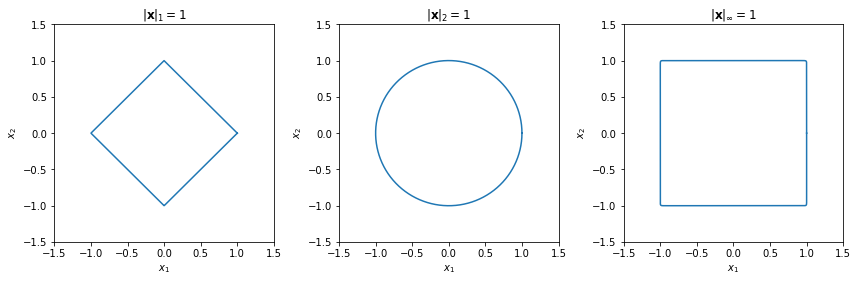

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# Definition des coordonées 
alpha = np.linspace(0, 2*np.pi, 2000, endpoint=True)
x = np.cos(alpha)
y = np.sin(alpha)

# Construction des vecteurs de coordonnées
vecs = np.array([x,y])

p = 1
norms = np.sum(np.abs(vecs)**p, axis=0)**(1/p)
N1 = vecs/norms

p = 2
norms = np.sum(np.abs(vecs)**p, axis=0)**(1/p)
N2 = vecs/norms

p = 99
norms = np.sum(np.abs(vecs)**p, axis=0)**(1/p)
Ninf = vecs/norms

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(N1[0], N1[1])
plt.title(r"$\| {\bf x} \|_{1} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.subplot(1, 3, 2)
plt.plot(N2[0], N2[1])
plt.title(r"$\| {\bf x} \|_{2} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.subplot(1, 3, 3)
plt.plot(Ninf[0], Ninf[1])
plt.title(r"$\| {\bf x} \|_{\infty} = 1$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])

plt.tight_layout(pad = 1.0)

plt.show()

### Normes de matrices

Pour calculer la norme d'une matrice, $\| A \|$, on peut utiliser n'importe quel vecteur ${\bf y}$ associé à une norme de vecteur pour définir une norme matricielle induite

$$
  \| A \|_{\bf y} = \| A {\bf y} \|
$$

où la norme dans le membre de droite est une norme de vecteur. Cette norme dépend du choix de ${\bf y}$. En maximisant sur l'ensemble des des vecteurs ${\bf y}$. Pour éviter que la norme dépendent de la taille du vecteur, on normalise par la norme du vecteur. Ceci nous permet de défnir une **norme matricielle induite**.

$$
  \| A \| = \max_{{\bf y}: \| {\bf y} \| = 1} \| A {\bf y} \|.
$$

Les normes vectorielles utilisées doivent toutes être identiques. Ainsi pour la norme $2$ matricielle induite s'écrit

$$
  \| A \|_2 = \max_{{\bf y}: \| {\bf y} \|_2 = 1} \| A {\bf y} \|_2.
$$

Pour certaines normes, il existe des méthodes beaucoup plus simple à mettre en oeuvre pour réaliser les calculs 

1. la norme matricielle $1$ est donnée par le maximum des normes $1$ des colonnes de $A$.

2. la norme matricielle $\infty$ est donnée par le maximum des normes $1$ des lignes de $A$.

L'ensemble des matrices de $\mathbb{R}^{n\times m}$ forme un espace vectoriel normé de dimension finie. La loi interne est l'addition de deux matrices. La loi externe est la multiplication par $\lambda \in \mathbb{R}$. L'élément neutre pour la loi est interne est la matrice nulle.

> Démontrer que l'ensemble des matrices de $\mathbb{R}^{n\times m}$ forme un espace vectoriel normé de dimension finie.

## Déterminant

Le déterminant est un objet mathématique, une application multilinéaire de $\mathbb{R}^{n\times m}$ dans $\mathbb{R}$, utilisé dans l'analyse et les solutions des systèmes d'équations linéaires. Le déterminant permet notamment de vérifier si un système est inversible.

> 
> 1. Si $A\in\mathbb{R}^{1\times 1}$, alors $A=a \Rightarrow A^{-1} = \dfrac{1}{a}$. Ainsi, $a\dfrac{1}{a} = 1$ si et seulement si $a\neq 0$.
2. Si $A\in\mathbb{R}^{2\times 2}$, par définition de l'inverse, nous savons que $A^{-1} A = I$. Alors, si il exsite, l'invese de $A$ s'écrit 
\begin{align}
A^{-1} = \dfrac{1}{a_{11}a_{22} - a_{21}a_{12}} \begin{bmatrix}  a_{22} & -a_{12}\\  -a_{21} & a_{22} \end{bmatrix}. 
\end{align}
On a donc que la matrice $A$ est invesible si et seulement si ${a_{11}a_{22} - a_{21}a_{12}} \neq 0$, ce qui est le déterminant de $A\in \mathbb{R}^{2\times 2}$.
 

> Pour toute matrice $A\in \mathbb{R}^{n\times n}$, $A$ est inversible si et seulement si $\det(A) \neq 0$.

La calcul du déterminant permet donc de vérifier l'inversibilité d'une matrice. Dans le cas général, calculer le déterminant d'une matrice $n\times n$ se réduit au calcul de déterminants de matrices $(n-1)\times (n-1)$. En appliquant de manière récursive les développements de Laplace, nous obtenons une formule pour le calcul du déterminant. 

> Théorème
> Soit $A\in\mathbb{R}^{n\times n}$. Alors, $\forall 1\leq j \leq n$,
> 1. Par développement selon la colonne $j$
\begin{equation}
det(A) = \sum_{k=1}^n (-1)^{k+j} a_{kj} det(A_{kj})
\end{equation}
>2.  Par développement selon la ligne $j$
\begin{equation}
det(A) = \sum_{k=1}^n (-1)^{k+j} a_{jk} det(A_{jk})
\end{equation}
\end{enumerate}
où $A_{kj} \in \mathbb{R}^{(n-1) \times (n-1)}$ est une sous matrice de $A$ obtenu en rayant la ligne $k$ et la colonne $i$ de $A$.


> Example
> Calculer le déterminant de 
\begin{align}
A = 
\begin{bmatrix}
3 & 2 & 1 \\
1 & 2 & 3 \\
0 & 0 & 1
\end{bmatrix}
\end{align}

En pratique, le calcul de déterminants par les développements de Laplace s'avère extrêment couteux. Dans le cas général, la complexité est $\mathcal O(n!)$.

In [6]:
# Implementation naïve du calcul de déterminant en utilisant les développements de Laplace
import time

def laplace(matrix, mul=1):

    # Recuperation de la taille de la matrice
    width = len(matrix)
    
    # On exclut le cas trivial
    if width == 1:
        return mul * matrix[0][0]
    else:
        sign = -1
        answer = 0
        # On parcours les lignes 
        for i in range(width):
            m = []
            # On supprrime les éléments de la ligne
            for j in range(1, width):
                buff = []
                for k in range(width):
                    if k != i:
                        buff.append(matrix[j][k])
                m.append(buff)
            
            # Le signe du multiplicateur dépend de la position dans la matrice
            sign *= -1
            
            # Appel récursif pour le calcul des déterminants des sous matrices
            answer = answer + mul * laplace(m, sign * matrix[0][i])
    return answer

Text(0, 0.5, 'temps (s)')

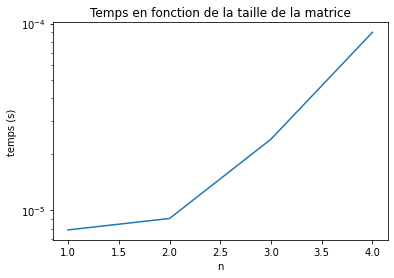

In [7]:
tic = []
n = 5 # Taille de la matrice la plus grande. Pour n=10, le temps est supérieur à 2s
for k in range(1,n) :
    A = np.random.random((k,k))
    t0 = time.time()
    laplace(A)
    t1 = time.time()
    tic.append(t1-t0)

plt.semilogy(range(1,n),tic)
plt.title("Temps en fonction de la taille de la matrice")
plt.xlabel("n")
plt.ylabel("temps (s)")

Le déterminant de $A$ possède les propriétés suivantes
- le déterminant d'un produit est le produit des déterminants : soient $A, B \in \mathbb{R}^{n\times n}$, alors $det(AB) = det(A) det(B)$.
- les déterminants sont invariants par transposition : $det(A) = det(A^T)$.
- si $A$ est inversible, $det(A^{-1})=\dfrac{1}{det(A)}$.
- les matrices semblables possèdent le même déterminant.
- ajouter une ligne ou une colonne un multiple d'une autre laisse le déterminant invariant.
- multiplier une ligne ou colonne par $\lambda \in \mathbb{R}$ revient à multiplier le déterminant par $\lambda$. En particulier, $det(\lambda A) = \lambda^n det(A)$.
- échanger deux lignes ou colonnes modifie le signe de $det(A)$.

## Trace

> Definition
Une matrice carrée $A\in \mathbb{R}^{n\times n}$ a pour trace
$$
tr(A) = \sum_{i=1}^n a_{ii}
$$

L'application trace est une application linéaire et $tr(I_n) = n$, $tr(A+B) = tr(A)+tr(B)$, $A,B\in \mathbb{R}^{n\times n}$. De plus, la trace est insensible aux changements de base.

> Exercice
Montrer que la trace est insensible aux changements de base.


## Valeurs propres et vecteurs propres

Nous allons maintenant nous intéresser à une autre caractérisation d'une matrice et des opérateurs linéaires associés.

> __Définition__
> 
>    Soit $A\in \mathbb{R}^{n\times n}$ une matrice carrée. Alors $\lambda \in \mathbb{R}$ est valeur propre et $x \in \mathbb{R}^n\setminus\{0\}$ un vecteur propre correspondant si 
>    $$ Ax = \lambda x $$


C'est ce que l'on appelle l'équation de la valeur propre. En général, les valeurs propres sont classées par ordre croissant. On appelle la première valeur propre la plus grande des valeurs propres en module.

> __Théorème__
> 
> Les propriétés suivantes sont équivalentes
> 1. $\lambda \in \mathbb{R}$ est valeur propre de $A \in \mathbb{R}^{{n\times n}}$.
> 2.  $\exists x \in \mathbb{R}^{n\times n}$ tel que $Ax = \lambda x$ ou ($ (A-\lambda I)x = 0$) peut être résolu pour $x \neq 0$.
> 3. $rg(A - \lambda I) < n$.
> 4. $det(A - \lambda I) = 0$.

Pour chaque valeur propre, il n'existe pas un unique vecteur propre, mais une famille. On dit que les vecteurs sont colinéaires. La famille des vecteurs propres associés à une valeur propre $\lambda$ forme un espace vectoriel normé de dimension finie, un espace propre de $A$, que l'on note $E_\lambda$.

Un espace propre est un invariant de $A$, c'est à dire  que $\forall x \in E_\lambda$, $Ax \in E_\lambda$.

La dimension de $E_\lambda$ peut être interpré comme le nombre maximum de vecteurs linéaires indépendants associés à $\lambda$. C'est ce que l'on appelle la multiplicité géométrique de $\lambda$.

> __Théorème__
> 
> $\lambda$ est une valeur propre de $A \in \mathbb{R}^{{n\times n}}$ si et seulement si $\lambda$ est racine du polynôme caractéristique $p_A(\lambda)$ de $A$. Le polynôme caractéristique de $A$ est défini par $p_A(\lambda) = det(A - \lambda I)$.


Trouver les valeurs propres de $A$ est donc équivalent à identifier les racines du polynôme caractéristique.

> __Exercice__
> 
> Calculer les valeurs propres et une base de vecteurs propres 
> \begin{equation*}
> A = 
> \begin{bmatrix}
> 4 & 2 \\
> 1 & 3
> \end{bmatrix}
> \end{equation*}

Le polynôme caractéristique est un outils théorique qui ne permet pas de déterminer dans la pratique les valeurs propres d'une matrice de grande dimension. Les méthodes de recherche de racines de polynômes ont une complexité trop élevées. Il reste un outils qui permet d'identifier les propriétés des valeurs, vecteurs et espaces propres.

Le polynôme caractéristique se factorise sous la forme
\begin{align}
p_A(x) &= (x-\lambda_1)^{m_1} (x-\lambda_2)^{m_2} \ldots (x-\lambda_r)^{m_p} \\
& = \prod_{k=1}^p (x- \lambda_k)^{m_k}
\end{align}
avec $p = \sum_{k=1}^p m_k$.
L'entier $m_k$ s'appelle la multiplicité algébrique de la valeur propre $\lambda_k$.

> __Théorème__
> 
> La multiplicité algébrique d'une valeur propre est au moins égale à sa multiplicité géométrique. 
> De plus, si la multiplicité algèbrique et la multiplicité artihmétique de chacune des valeurs propres sont égales, alors la matrice est diagonalisable.

> __Exercice__
> 
> Calculer la multiplicité algébrique et la multiplicité géométrique des matrices suivantes
> \begin{equation}
> A = 
> \begin{bmatrix}
> 2 & 0 & 0 \\
> 0 & 2 & 0 \\
> 0 & 0 & 2
> \end{bmatrix},
> B = 
> \begin{bmatrix}
>  2 & 1 & 0 \\
> 0 & 2 & 1 \\
>  0 & 0 & 2
> \end{bmatrix}
> \end{equation}
> Que peut-on en déduire?

Les valeurs propres et vecteurs propres sont des caractéristiques importantes des matrices. Elles permettent d'étudier leur comportement et le comportement des applications dont elles sont issues.

Certaines matrices possèdent des propriétés très particulières qui facilitent le calcul des valeurs propres.

> Théorème : [Theorème spectral]
Soit $A\in \mathbb{R}^{{n\times n}}$, une matrice symétrique. Il existe une base orthonormale correspondant à l'espace généré par les vecteurs propres de $A$ et chaque valeur propre est réelle.

Ce théorème permet de garantir, sous certaines conditions, que la matrice est diagonalisable. Peut-on se ramener à une matrice symétrique à partir de n'importe quelle matrice? En quelque sorte, oui.

> __Théorème__
> 
> Soit $A\in \mathbb{R}^{{m\times n}}$. Il est toujours possible d'obtenir une matrice symétrique, semi-définie, positive $S\in \mathbb{R}^{n\times n}$, (respectivement $S\in \mathbb{R}^{m\times m}$), en définissant 
> \begin{equation}
> S = A^T A \; \;\; (resp. S=A A^T)
> \end{equation}

Avant de parler des méthodes pratiques de calcul des valeurs propres, nous pouvons évoquer le lien avec la trace et le déterminant.

> __Théorème__
> - Le déterminant d'une matrice $A\in \mathbb{R}^{n\times n}$ est le produit de ses valeurs propres, éventuellement répétées plusieurs fois.
> - Le trace d'une matrice $A\in \mathbb{R}^{n\times n}$ est la somme de ses valeurs propres, éventuellement répétées plusieurs fois.

La notion de valeur propre, vecteur propre est utilisée notamment pour classer les recherches google par ordre d'importance (i.e. par rapport à la probabilité qu'une personne clique sur un lien donné).

# Quelques exercices

1.  Soit ${A} = \begin{bmatrix} 1 & 2 \\ 0 & 1\end{bmatrix}$.

    a.  Écrivez $\chi_{{A}}(\lambda)$ sous la forme $a\lambda^2 + b\lambda +
        c$, où $a,b,c\in\mathbb{R}$.

    b.  Trouvez toutes les valeurs propres de ${A}$.

    c.  Pour chaque valeur propre trouvée, trouvez un vecteur propre associé.

2.  Déterminez toutes les valeurs propres de
    $\begin{bmatrix} 7 & 12 & 4 \\ -8 & -13 & -4 \\ 16 & 24 & 7 \end{bmatrix}$.
    
1.  Soit ${A} = \begin{bmatrix} 1 & 2 \\ 3 & 2 \end{bmatrix}$.

    a.  Déterminez les valeurs propres de ${A}$.

    b.  Déterminez la multiplicité algébrique et la multiplicité géométrique de chacune des valeurs propres. 

2.  Soit ${A} = \begin{bmatrix} 8 & -9 \\ 4 & -4 \end{bmatrix}$.

    a.  Déterminez toutes les valeurs propres de ${A}$.

    b.  Déterminez la multiplicité algébrique et la multiplicité géométrique de chacune des valeurs propres. 

3.  Soient ${A}, {B} \in \mathbb{C}^{n\times n}$. On dit que ${A}$ et ${B}$  sont **similaires** si ${B}= {S}^{-1}{A}{S}$ pour une matrice inversible ${S}\in\mathbb{C}^{n\times n}$.

    a.  Démontrez que $\chi_{A}(\lambda) = \chi_{B}(\lambda).$

    b.  Soit $\lambda'$ une valeur propre de ${A}$.  Démontrez que la multiplicité géométrique de $\lambda'$ est au moins la multiplicité algébrique de $\lambda'$.
